In [18]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])
  except RuntimeError as e:
    print(e)

In [20]:
age_model = DeepFace.build_model("Age")

In [21]:
age_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                             

In [22]:
person_no = 1
filter_no = 2

In [23]:
original_img = "Dataset/Face Dataset/{}/{}.jpg".format(person_no, person_no)
filtered_img = "Dataset/Face Dataset/{}/Filtered/{}_{}.jpg".format(person_no, person_no, filter_no)

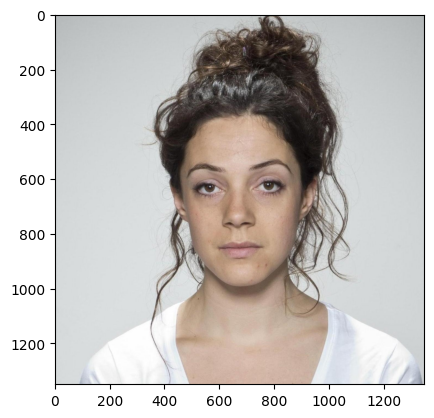

In [24]:
img1 = cv2.imread(original_img)
plt.imshow(img1[:, :, ::-1])

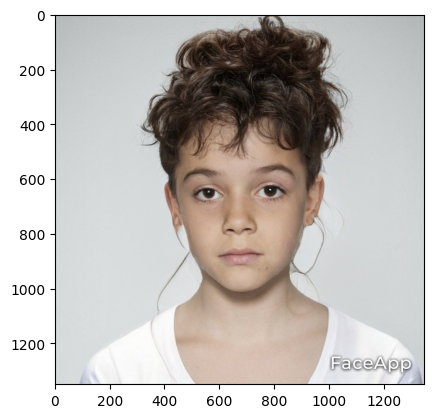

In [25]:
img2 = cv2.imread(filtered_img)
plt.imshow(img2[:, :, ::-1])

In [26]:
img1.shape

(1350, 1350, 3)

In [41]:
from deepface.commons import functions
person_no = 1
original_img = "Dataset/Face Dataset/{}/{}.jpg".format(person_no, person_no)
face1 = functions.preprocess_face(original_img, detector_backend='retinaface', enforce_detection=False)

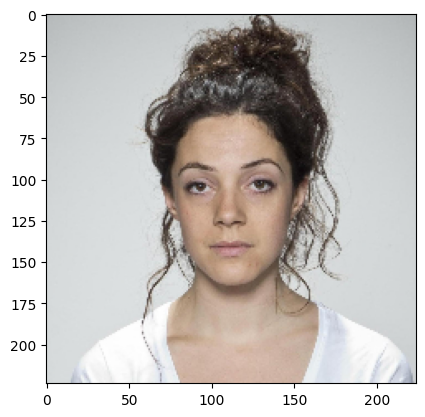

In [42]:
plt.imshow(face1[0][:, :, ::-1])

In [43]:
age_probs = age_model.predict(face1)

In [44]:
age_probs.shape

(1, 101)

In [45]:
import numpy as np
age = np.argmax(age_probs)

In [46]:
age

27

In [22]:
import pandas as pd
df = pd.read_csv('Dataset/Attribute_Data/london_faces_info.csv')
df.head()

,face_id,face_age,face_gender,face_eth
0,1,24.0,female,white
1,2,24.0,female,white
2,3,38.0,female,white
3,4,30.0,male,white
4,5,28.0,male,east_asian


In [23]:
face2 = functions.preprocess_face(filtered_img, detector_backend='retinaface', enforce_detection=False)
age_filter_probs = age_model.predict(face2)

In [24]:
age_filter = np.argmax(age_filter_probs)

In [25]:
age_filter

21

In [ ]:
predicted_ages = []

In [31]:
len(predicted_ages)

30

In [32]:
for person_no in range(31, 103):
    img_path = "Dataset/Face Dataset/{}/{}.jpg".format(person_no, person_no)
    face = functions.preprocess_face(img_path, detector_backend='retinaface', enforce_detection=False)
    print('Predicting age for person no - {}...'.format(person_no))
    age_pred = np.argmax(age_model.predict(face))
    predicted_ages.append(age_pred)

Predicting age for person no - 31...
Predicting age for person no - 32...
Predicting age for person no - 33...
Predicting age for person no - 34...
Predicting age for person no - 35...
Predicting age for person no - 36...
Predicting age for person no - 37...
Predicting age for person no - 38...
Predicting age for person no - 39...
Predicting age for person no - 40...
Predicting age for person no - 41...
Predicting age for person no - 42...
Predicting age for person no - 43...
Predicting age for person no - 44...
Predicting age for person no - 45...
Predicting age for person no - 46...
Predicting age for person no - 47...
Predicting age for person no - 48...
Predicting age for person no - 49...
Predicting age for person no - 50...
Predicting age for person no - 51...
Predicting age for person no - 52...
Predicting age for person no - 53...
Predicting age for person no - 54...
Predicting age for person no - 55...
Predicting age for person no - 56...
Predicting age for person no - 57...
P

In [33]:
df_age = df[['face_id', 'face_age']]

In [34]:
df_age['predicted_age'] = predicted_ages

In [36]:
df_age

,face_id,face_age,predicted_age
0,1,24.0,27
1,2,24.0,31
2,3,38.0,44
3,4,30.0,25
4,5,28.0,31
...,...,...,...
97,142,26.0,25
98,143,29.0,31
99,144,27.0,36
100,172,40.0,38


In [38]:
age_dict = {}
for person_no in range(1,103):
    age_dict[person_no] = {'actual_age': df_age.iloc[person_no-1]['face_age'],
                           'predicted_age': df_age.iloc[person_no-1]['predicted_age']}

In [60]:
df_dict = {'face_id':[num for num in range(1,103)], 'actual_age':[], 'predicted_age':[]}

In [67]:
df_dict['actual_age'] = df_age['face_age'].to_list()

In [69]:
df_dict['predicted_age'] = df_age['predicted_age'].to_list()

In [73]:
import pickle
with open("Results/Numerical Analysis/age_dict.pkl", "wb") as f:
    pickle.dump(df_dict, f)

In [2]:
import os
import pickle
if os.path.exists("Results/Numerical Analysis/age_dict.pkl"):
    with open("Results/Numerical Analysis/age_dict.pkl", "rb") as f:
        df_dict = pickle.load(f)

In [4]:
import pandas as pd
df_age = pd.DataFrame.from_dict(df_dict).dropna()

In [9]:
html = df_age[:10].to_html() 
with open('df_age.html', 'w') as f:
    f.write(html)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_val = r2_score(df_age["actual_age"], df_age["predicted_age"])
mae = mean_absolute_error(df_age["actual_age"], df_age["predicted_age"])
mse = mean_squared_error(df_age["actual_age"], df_age["predicted_age"])

In [99]:
r2_val, mae, mse

(-0.35215673098460853, 6.81, 67.61)